# Imports

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets,transforms
import torchinfo
from torchinfo import summary

from tqdm.auto import tqdm
from typing import Dict,List
import os
import random
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
import requests
import shutil
from pathlib import Path

: 

In [ ]:
print(f"Pytorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
if torch.cuda.is_available():
    print("Device available: Cuda")
else: print("Device available:: Cpu")

Pytorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118
Device available: Cuda


In [ ]:
#path to data folder
data_path= Path("obj_train_data/")
print(f"Data is located at path: {data_path}")

#let's look at the files
for dirpath, dirnames, filenames in os.walk(data_path):
    filetypes= set()
    for file in filenames:
        file_extension= os.path.splitext(file)[1].lower()
        filetypes.add(file_extension)
    print("-"*60)
    print("-"*60)
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")
    print(f"and contains following filetypes : {filetypes}")
    print("-"*60)
    print("-"*60)


Data is located at path: obj_train_data
------------------------------------------------------------
------------------------------------------------------------
There are 0 directories and 1288 files in 'obj_train_data'.
and contains following filetypes : {'.txt', '.jpg'}
------------------------------------------------------------
------------------------------------------------------------


In [ ]:
#now lets make a list of imagefiles 
image_filenames= [f for f in os.listdir(data_path) if f.endswith('.jpg') ]
image_filenames.sort() #sorting images in a specific order
random.seed(10) #setting random seed for reproducibility
random.shuffle(image_filenames) #shuffiling the ordering of images
#split the data

In [ ]:
split_ratio= 0.8
split_index= int(len(image_filenames) * split_ratio)
split_index

515

# Train Test split
Specify train and test folder path
check it these folder exists or not
if not create one

In [ ]:
#folder paths
dataset_path= Path("data/")
train_path= dataset_path / "train"
test_path= dataset_path / "test"

In [ ]:
#checking for train folder
if train_path.is_dir():
    print(f"{train_path} directory exists")
else:
    print(f"{train_path} directory doesnot exists. Creating one ....")
    train_path.mkdir(parents=True, exist_ok=True)
    print("created ")
    print("++++"*20)

#checking for test folder
if test_path.is_dir():
    print(f"{test_path} directory exists")
else:
    print(f"{test_path} directory doesnot exists. Creating one....")
    test_path.mkdir(parents=True, exist_ok=True)
    print("created ")
    print("++++"*20)

data\train directory doesnot exists. Creating one ....
created 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data\test directory doesnot exists. Creating one....
created 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
for i, image_name in enumerate(image_filenames):
    label_name= image_name.replace('.jpg','.txt')
    if i < split_index:
        shutil.move(os.path.join(data_path,image_name),train_path)
        shutil.move(os.path.join(data_path,label_name),train_path)
    else:
        shutil.move(os.path.join(data_path,image_name),test_path)
        shutil.move(os.path.join(data_path,label_name),test_path)

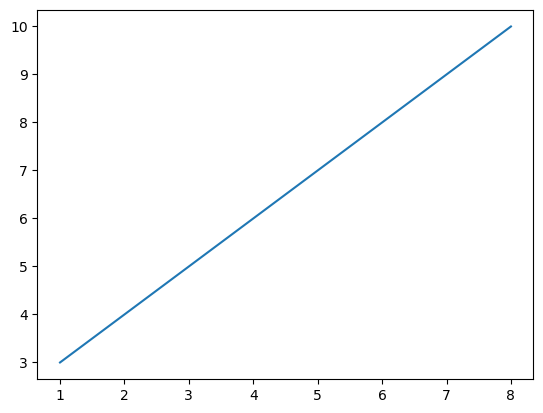

In [1]:
import matplotlib.pyplot as plt
import numpy as np
xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.show()

In [3]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')
results = model.train(data='config.yaml', epochs=1)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    897664  ultralytics.nn.modules.head.Detect           [80, [64, 128, 256]]          
YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients

Ultralytics YOLOv8.0.124  Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=config.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=Tru

RuntimeError: DataLoader worker (pid(s) 18900, 17168, 11044, 17784, 9952, 12232, 4680, 11980) exited unexpectedly